In [1]:
#Importing all the necessary libraries

import pandas as pd
import warnings
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#importing the first version of our dataset for initial EDA
data_boom_1 = pd.read_csv('day.csv')

In [3]:
data_boom_1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
data_boom_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data_boom_1['season'].value_counts()
data_boom_1.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [6]:
def season_conversion(x):
    
    if x == 1:
        return 'spring'
    
    elif x == 2:
        return 'summer'
    
    elif x == 3:
        return 'fall'
    
    else:
        return 'winter'
    
#-----------------------------------------------------------------------
# 2nd function for weather conversion
def weathersit_conversion(x):
    
    if x == 1:
        return "clear" # in our dataset which  is original has been given long descriptive names but in our conversion we will be shortneing it for ease of use
    
    elif x == 2:
        
        return  "Misty"
    
    elif x == 3:
        
        return "Light Snow"
    
    else:
        
        return "Heavy rain"

In [7]:
data_boom_1['season'] = data_boom_1.season.apply(season_conversion)

In [8]:

data_boom_1['season'].value_counts()


fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [9]:
 data_boom_1['weathersit'] = data_boom_1.weathersit.apply(weathersit_conversion)

In [10]:
data_boom_1.weathersit.value_counts()

clear         463
Misty         246
Light Snow     21
Name: weathersit, dtype: int64

In [11]:
def weekday(x):
    
    if x == 1:
        return 'Mon'
    
    elif x == 2:
        return 'Tue'
    
    elif x == 3:
        return 'Wed'
    
    elif x == 4:
        return 'Thur'
    
    elif x == 5:
        return 'Fri'
    
    elif x == 6:
        return 'Sat'
    
    else:
        return 'Sun'

In [12]:
data_boom_1.weekday = data_boom_1.weekday.apply(weekday)

In [13]:
data_boom_1.weekday.value_counts()
    

Mon     105
Tue     105
Thur    104
Wed     104
Sun     104
Fri     104
Sat     104
Name: weekday, dtype: int64

In [14]:
def month(x):
    if x == 1:
        return 'Jan'
    
    elif x == 2:
        return 'Feb'
    
    elif x == 3:
        return 'Mar'
    
    elif x == 4:
        return 'Apr'
    
    elif x == 5:
        return 'May'
    
    elif x == 6:
        return 'Jun'
    
    elif x == 7:
        return 'Jul'
    
    elif x == 8:
        return 'Aug'
    
    elif x == 9:
        return 'Sep'
    
    elif x == 10:
        return 'Oct'
    
    elif x == 11:
        return 'Nov'
    
    elif x == 12:
        return 'Dec'

In [15]:
data_boom_1['mnth'] = data_boom_1.mnth.apply(month)

In [16]:
data_boom_1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thur,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,Dec,0,Fri,1,Misty,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,Dec,0,Sat,0,Misty,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,Dec,0,Sun,0,Misty,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,Dec,0,Mon,1,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [17]:
list_numerical = [feature for feature in data_boom_1.columns if data_boom_1[feature].dtype != 'O'] # Using list comprehension to get all possible numerical variables

In [18]:
list_numerical

['instant',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

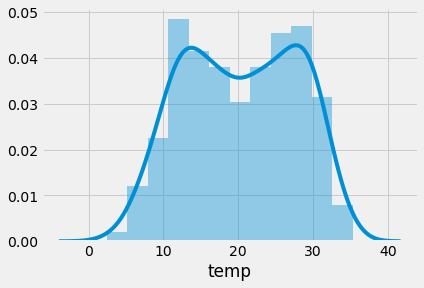

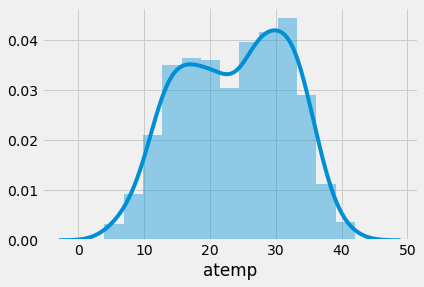

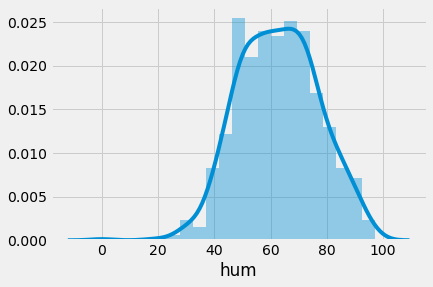

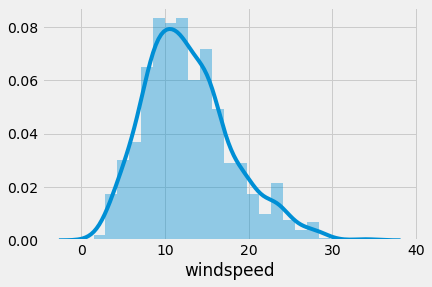

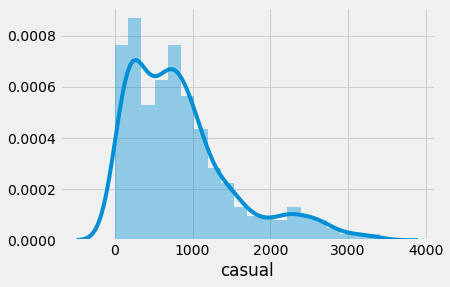

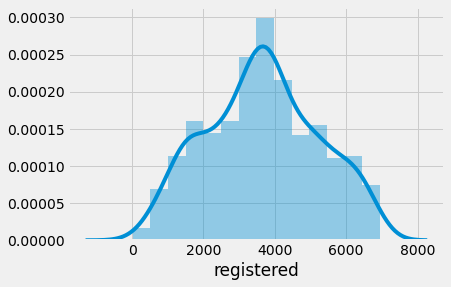

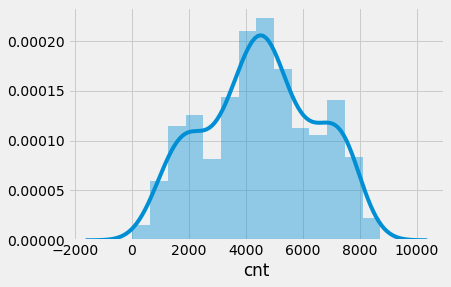

In [19]:
#plotting the histogram for the numerical features
#in the below for loop I am ignoring yr, instant etc since these are categorical entities and drawing histogram for these won't make sense

for i in list_numerical:
    
    if i == 'yr' or i == 'instant' or i == 'holiday' or i == 'workingday':
        pass
    
    else:
        
        sns.distplot(data_boom_1[i])
        plt.show()

In [20]:
list_categorcal = [feature for feature in data_boom_1.columns if data_boom_1[feature].dtype == 'O']

In [21]:
list_categorcal

['dteday', 'season', 'mnth', 'weekday', 'weathersit']

In [22]:
# lets do a group by with respect to count that is our target variable for each of our categorical variable
# I willl be creating a function for the same which will take the list of our categorical variable group it with respect to count variable and will plot a bar chart for the same

def function_bargraph(list_1):
    
    
    
    data_boom_2 = data_boom_1.copy() # I am creating a deep copy version so any effect on our original data frame which has been 
    #declared globally will not show in outside this function
    
    for i in list_1:
        
        if i == 'dteday':
            pass
        
        else:
        
            y = data_boom_2.groupby(i)['cnt'].sum()
            y.plot.bar()
            plt.show()

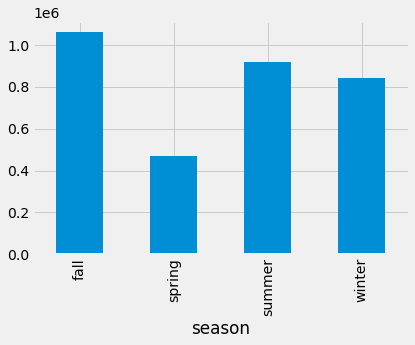

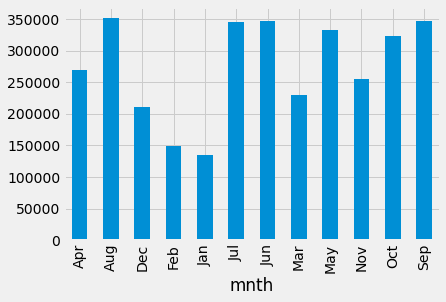

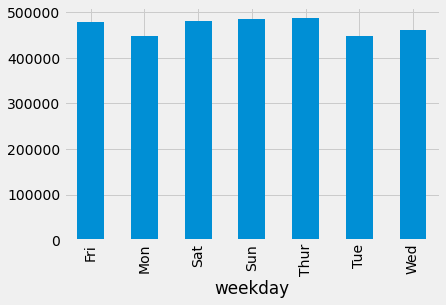

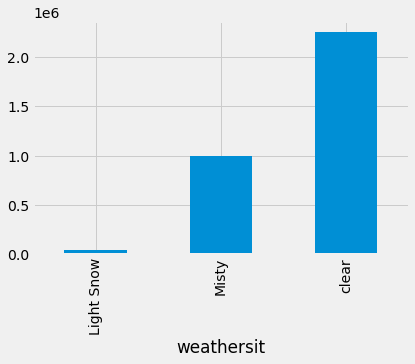

In [23]:
function_bargraph(list_categorcal)

# EDA INFERENCES

1. Fall season among all the seasons in the year are showing the highest rental count
2. Clear weather is showing the highest rental count , this is obivious since as the season pass through misty and lightsnow , the favorable conditions for biking considerably decreases causing the rental demand to decrease.
3. All though there is not a huge difference between the rental demands between weekdays and weekends but saturday and sunday is showing a slightly higher demand overall
4. August is the month where rental demand reaches the peak of all the demand 


In [24]:
data_boom_1['dteday'] = pd.to_datetime(data_boom_1.dteday) # converting dte day to date time variable

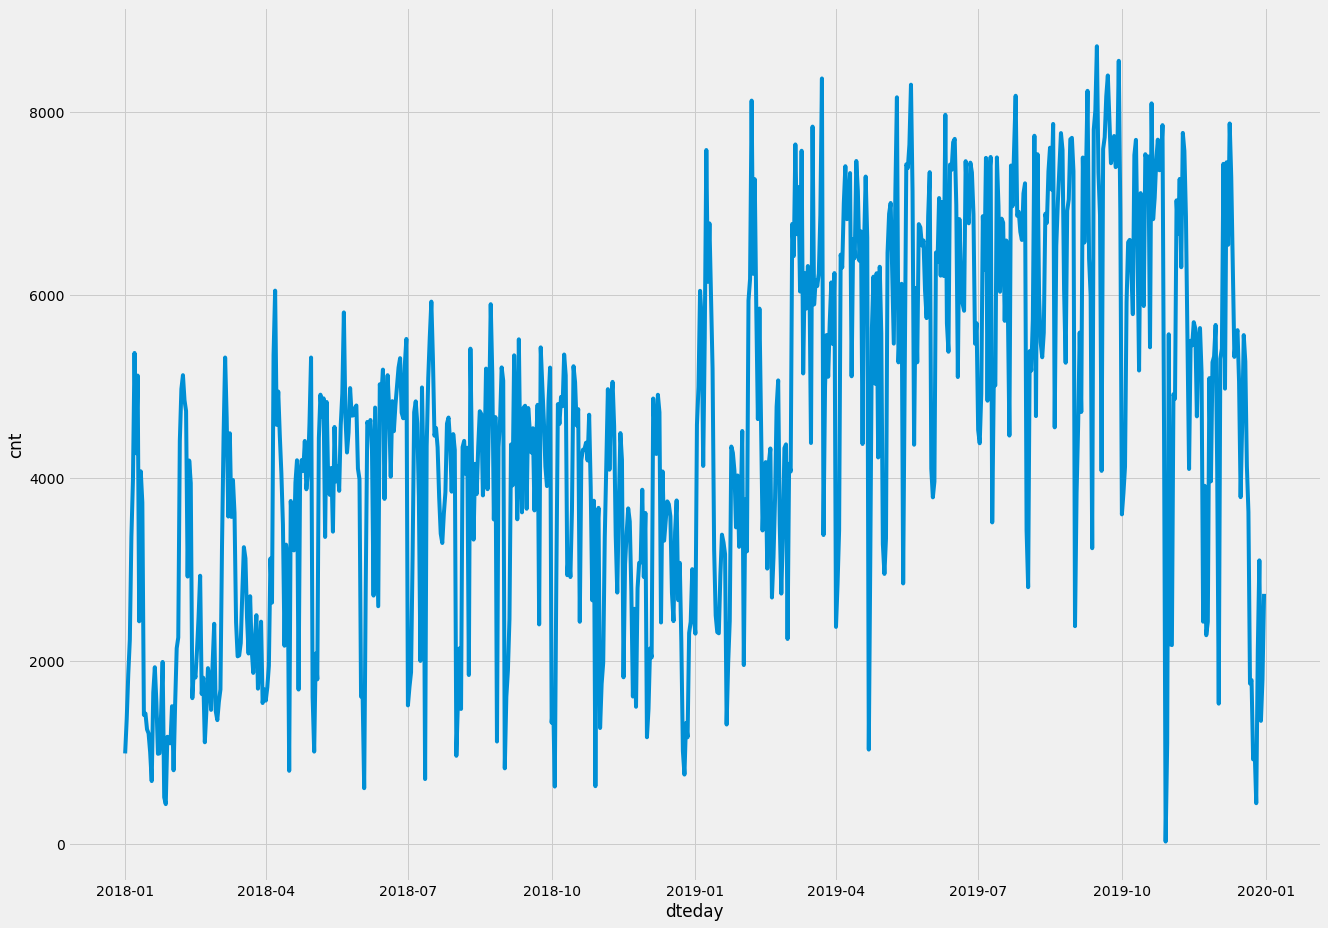

In [25]:
#plotting a line plot to see what kind of trend is shown by the rental with respect to the dates


fig,ax = plt.subplots(figsize = (20,15))

sns.lineplot(data_boom_1.dteday,data_boom_1.cnt)

# Although it is showing a positive trend where the overall scale of our rentals have increased over the years but it can 
#be seen that there are huge dips happening every year on particular months and date

plt.show()

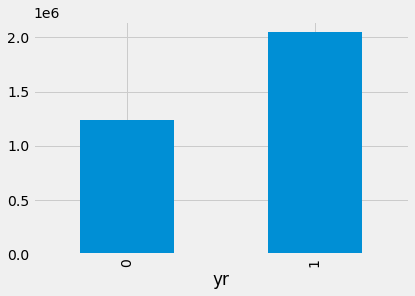

In [26]:
data_boom_1_yr = data_boom_1.groupby('yr')['cnt'].sum()
data_boom_1_yr.plot.bar()
plt.show()

# something which can be noticed is that the sales has been increasing year over year , and thus year could act as a positive 
#factor in our dataset

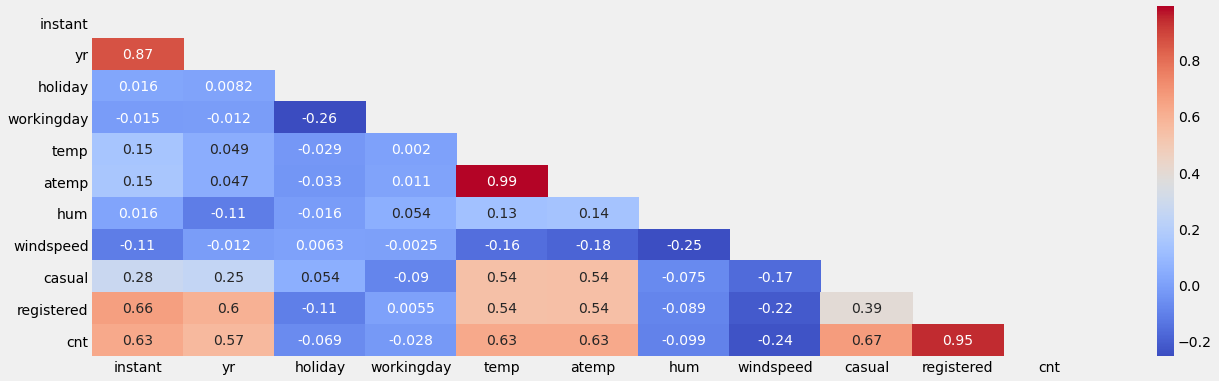

In [27]:
# lets plot a heatmap with respect to our data to see the correlation between the numerical variables

fig,ax = plt.subplots(figsize = (20,6))

data_corr1 = data_boom_1.corr()
mask = np.zeros_like(data_corr1,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(data_corr1,mask=mask,cmap = 'coolwarm' , annot = True)
plt.show()

# basically removing the duplicate columns created during our heatmap

# INFERENCES 

1. There is a high correlation between target and year variable 
2. There is also a high between target and temp variable
3. There is a huge amount of correation between temp and atemp which is coming close to 0.99 , showcasing that there is a huge multicollinearity with them
4. There is a negative correlation between target and holiday,workingday , windspeed and humidity. Definitely increase in any of these variables can result in a dip down of our rentals.

In [28]:
data_boom_1

# In our present dataset although yr , workingday and holiday is a categorical variable we will not be going to do any dummy conversion with them
#since they are already in binary form showcasing a yes-no behaviour.



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thur,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,spring,1,Dec,0,Fri,1,Misty,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,spring,1,Dec,0,Sat,0,Misty,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,spring,1,Dec,0,Sun,0,Misty,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,spring,1,Dec,0,Mon,1,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [29]:
# we will be moving forward to convert season,mnth, weekday and weathersit further to get dummies

columns_dummies = ['season','mnth','weekday','weathersit']

data_boom_2  = pd.get_dummies(data_boom_1[columns_dummies],drop_first=True)



In [30]:
data_boom_2.shape

# we have got 22 columns after dropping n-1 columns from each of our category

(730, 22)

In [31]:
data_boom_2

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_clear
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [32]:
# we will be dropping the variables instant , dteday , temp , casual and registered from our dataset , since we won't be needing them

data_boom_1 = data_boom_1.drop(['instant','dteday','atemp','casual','registered'] , axis = 1)

In [33]:
data_boom_final = pd.concat([data_boom_1,data_boom_2],axis = 1)

# merging the dataframe with  our main dataframe

In [34]:
data_boom_final = data_boom_final.drop(['season','mnth','weekday','weathersit'],axis = 1) # we will be dropping the categorical variables

In [35]:
data_boom_final

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_clear
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,0,0,0,1,0
726,1,0,0,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,1,0,0,0,0,1,0
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler_model = MinMaxScaler()

In [37]:
X = data_boom_final.drop(['cnt'],axis = 1) # we are first making the dataframe with respect to only our independent variable

In [38]:
X

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_clear
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
726,1,0,0,10.386653,59.0000,10.416557,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
727,1,0,0,10.386653,75.2917,8.333661,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [39]:
y = data_boom_final[['cnt']]

In [40]:
y

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
725,2114
726,3095
727,1341
728,1796


In [41]:
#lets do a train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train.shape

(511, 28)

In [43]:
X_test.shape

(219, 28)

In [44]:
y_train.shape

(511, 1)

In [45]:
y_test.shape

(219, 1)

In [46]:
num_vars = ['temp','hum','windspeed']

X_train[num_vars] = scaler_model.fit_transform(X_train[num_vars])

<ipython-input-46-64e1a78327b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_vars] = scaler_model.fit_transform(X_train[num_vars])
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_clear
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,0.405237,0.543468,0.621696,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
106,0,0,1,0.495350,0.494203,0.704080,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
270,0,0,1,0.717562,0.874624,0.316186,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
435,1,0,1,0.507811,0.504079,0.464173,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
# we are going to first use RFE to select top 20 features and then going to do a manual tuining further

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 4),
 ('weekday_Thur', False, 9),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_Misty', True, 1),
 ('weathersit_clear', True, 1)]

In [50]:
col_chosen = X_train.columns[rfe.support_]

In [51]:
col_chosen # we have chosen 21 variables as per RFE

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Misty', 'weathersit_clear'],
      dtype='object')

In [52]:
X_train_rfe_top = X_train[col_chosen]

In [53]:
X_train_rfe_top.shape

# we have succesfully selected top 20 columns from our datset



(511, 20)

In [54]:
import statsmodels.api as sm

In [55]:
X_train_sm = sm.add_constant(X_train_rfe_top)

In [56]:
LinearRegression_1 = sm.OLS(y_train,X_train_sm).fit()

In [57]:
print(LinearRegression_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     134.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          3.05e-184
Time:                        03:54:24   Log-Likelihood:                -4115.1
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     490   BIC:                             8361.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1291.3246    446.848  

In [58]:
#Lets go ahead and check the VIF of our model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# from below we can see that there is a high VIF for weather_sit , misty winter and spring
# We are going to further remove those variable and see the performance of our model

,Features,VIF
0,const,169.14
20,weathersit_clear,10.85
19,weathersit_Misty,9.24
8,season_winter,6.83
6,season_spring,5.64
3,temp,4.16
13,mnth_Nov,3.84
14,mnth_Oct,3.63
7,season_summer,3.55
9,mnth_Dec,2.03


In [59]:
# Here I am going to create a function which will drop the variable selected by the user and will build the model from the remaining variable
# This function will help us to find out the best variables for our model without writting code for 
#training each model. Once we have got the best model , we will be training that again on our final 
#data set and will be testing the same on our test data set
def build_model_stats(list_variables):
    
    X_train_build = X_train_sm.copy() # We are making a deep copy
    # Since our X_train_sm is a global defined dataframe and change in the function will cause the change
    #in actual value of our dataframe rendering a lot of errors
    # so at each instance when our function will run it will creat a deep copy of both x_train and y_train data
    # any change here will not reflect outside the function
    
    X_train_build = X_train_build.drop(list_variables,axis = 1)
    X_train_build_sm = sm.add_constant(X_train_build)
    
    y_train_build = y_train.copy()
    
    model_1 = sm.OLS(y_train_build,X_train_build_sm).fit()
    
    
    print(model_1.summary())
    
    print(' ')
    print(' ')
    
    vif = pd.DataFrame()
    vif['Features'] = X_train_build_sm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_build_sm.values, i) for i in range(X_train_build_sm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    print('---------------------------------- The New VIF is printed below')
    
    print(vif)

    
    
    
    
    

In [60]:
build_model_stats(['weathersit_clear'])

# At our first glance of the model we can notice that after weathersit_clear from our model 
# due to high VIF in our dataset , the Vif of weathersit_misty has dropped down to 1.4 further

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          3.55e-172
Time:                        03:54:24   Log-Likelihood:                -4146.8
No. Observations:                 511   AIC:                             8334.
Df Residuals:                     491   BIC:                             8418.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3693.0125    353.542  

In [61]:
# We can Notice that season_summer is showing a high p-value so we are going to remove it next

build_model_stats(['weathersit_clear','season_summer'])

# After removing season_summer further we can see that our model is becoming more and more stabel
# Where we are getting low vif , to further stabilise our model we are going to remove high-pvalue
#objects and will see how the model performs

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          5.46e-173
Time:                        03:54:24   Log-Likelihood:                -4147.4
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     492   BIC:                             8413.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3873.2613    311.322  

In [62]:
build_model_stats(['weathersit_clear','season_summer','weekday_Tue'])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          8.28e-174
Time:                        03:54:24   Log-Likelihood:                -4148.0
No. Observations:                 511   AIC:                             8332.
Df Residuals:                     493   BIC:                             8408.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3853.3007    310.839  

In [63]:
build_model_stats(['weathersit_clear','season_summer','weekday_Tue','mnth_Oct'])

# This will be our final model which we are going to train our model on and test.
# We can observe optimal Vif score , almost no sign of multi-collinearity.
# All the P-values are in the stable range
# We have got a close value between Adj R2 and R-square
# Accuracy is decent 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     144.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.30e-174
Time:                        03:54:24   Log-Likelihood:                -4148.7
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     494   BIC:                             8403.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3829.0712    310.222  

In [64]:
# Training our final model  

X_train_sm_final = X_train_sm.drop(['weathersit_clear','season_summer','weekday_Tue','mnth_Oct'],axis=1)

In [65]:
lr_model_final = sm.OLS(y_train,X_train_sm_final).fit()

In [66]:
#Looking at our final model summary

print(lr_model_final.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_final.values, i) for i in range(X_train_sm_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" ")
print(" ")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     144.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.30e-174
Time:                        03:54:24   Log-Likelihood:                -4148.7
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     494   BIC:                             8403.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3829.0712    310.222  

# RESIDUAL ANALYSIS

As per our assumption of linear regression , we know that our errors should be normally distributed and there shoud not be any pattern observed between them

Below we are going to plot the histogram between the error we have got in the prediction , comparing our y predicted value and 
y actual value

In [67]:
y_train_cnt = lr_model_final.predict(X_train_sm_final)

In [68]:
y_train_cnt

683    5022.812228
645    5026.085782
163    4242.501805
360     679.026845
640    7101.534970
          ...     
71     2344.613627
106    3561.188306
270    5143.977868
435    5018.695101
102    2430.432071
Length: 511, dtype: float64

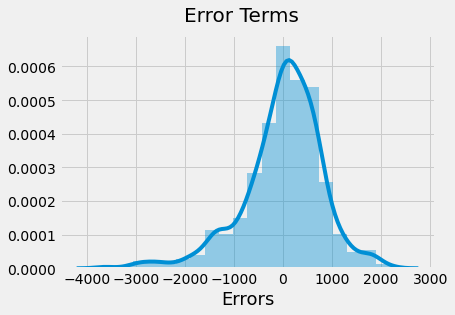

In [69]:
y_train_1 = y_train.iloc[:,0] # since I will be comparing two series data I am converting my y_train back into series ,
#other wise plot will not come

fig = plt.figure()
sns.distplot((y_train_1 - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

# from Below we can see that our error terms are normally distributed so our model is valid

# TESTING OUR MODEL ON TEST DATA

After the succesful completion of building our model , where going to test the accuracy of the model on our 30% remaining test
data

In [70]:
X_test_final = X_test.drop(['weathersit_clear','season_summer','weekday_Tue','mnth_Oct'],axis=1)

In [71]:
X_test_final_sm = sm.add_constant(X_test_final)

In [72]:
columns = ['temp','hum','windspeed']
X_test_final_sm[columns] = scaler_model.transform(X_test_final_sm[columns]) # Applying the same scaler  model

In [73]:
# since we have applied RFE in our model on train set we have to remove further 8 columns from our test data to make it of the same shape

list_remove = list(set(X_test_final_sm.columns) - set(X_train_sm_final.columns))

X_test_final_sm = X_test_final_sm.drop(list_remove,axis = 1)

In [74]:
X_test_final_sm.shape # We have got it of the same shape with respect to our Training dataset

(219, 17)

In [75]:
X_train_sm_final.shape

(511, 17)

In [76]:
y_test_pred = lr_model_final.predict(X_test_final_sm)

In [77]:
y_test_pred

468    6038.728707
148    4407.611455
302    3788.013356
355    1660.846084
515    7318.796412
          ...     
332    2827.168606
532    6173.152990
558    6903.153526
137    3511.986140
314    2664.276663
Length: 219, dtype: float64

In [78]:
from sklearn.metrics import r2_score

r2_score_model = r2_score(y_test,y_test_pred)

In [79]:
r2_score_model # We have an r2 score of 0.81 

0.8102400285832976

Text(0, 0.5, 'y_pred')

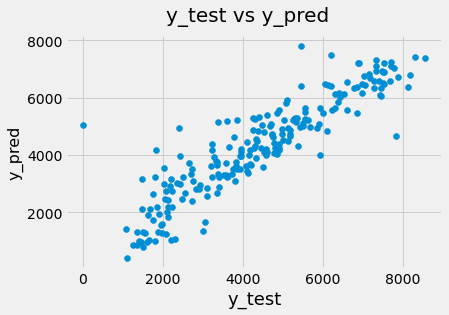

In [80]:
# Below shows the linear relationship between our test or actual y value and predicted value
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)   

# CONCLUSION

Top 10 variables which are significant to our model is 

1. year
2. temperature
3. Holiday
4. Hum
5. Windspeed
6. season_spring
7. season_winter
8. mnth_december
9. Weekday_wednesday
10. mnth_march


Year variable describes the maximum variance of our dependent variable rental count. Also Temperature is also a positive predictor of target variable. From our initial EDA we have observed a negative correlation between Humidity and rental bike along with windspeed. Windspeed is a factor which is important to business as on the days when there is a high windspeed , the weather is generally considered bad also different seasons show different windspeed range , so windspeed is also a good predictor of which season can bring out most rental. Based on which the company can decide to market the Bikes maximum also to keep sufficient storage for rental to meet the demand and take out maximum benifit. Also as stated seasons are also a big predictor or explains a good amount of variance in our rental variable

In [81]:
# A further enhance look on the weather conditions and weatherforecasting can also result in a better and more accurate model for the busines